In [180]:
import matplotlib.pyplot as plt
import pandas as pd

In [181]:
data = pd.read_excel("social_data.xlsx")
data

,Published Date,Account,Account Type,Campaign Name,Total Impressions,Total Engagements,Media Type
0,2023-03-31 19:55:43.192,CSGO,TWITTER,N/A,0,0,Text
1,2023-03-31 19:49:35.243,CSGO,TWITTER,N/A,0,0,Text
2,2023-03-31 19:49:33.535,CSGO,TWITTER,N/A,0,0,Text
3,2023-03-31 19:49:31.583,CSGO,TWITTER,N/A,0,0,Text
4,2023-03-31 19:43:42.590,CSGO,TWITTER,Community Engagement,9517,1215,Video
...,...,...,...,...,...,...,...
3474,2023-01-03 10:35:12.652,CSGO,TWITTER,N/A,0,0,Link
3475,2023-01-03 10:34:55.487,CSGO,TWITTER,N/A,0,0,Link
3476,2023-01-03 10:34:38.631,CSGO,TWITTER,N/A,0,0,Link
3477,2023-01-03 10:34:03.438,CSGO,TWITTER,N/A,2116,42,Text


In [194]:
# Task 1:
# Calculate the average engagement rate
average_engagement_rate = data['Total Engagements'].mean() / data['Total Impressions'].mean()
print("Average engagement rate is {:.2%}.".format(average_engagement_rate))

# Calculate the likelihood of achieving a 15% engagement rate
likelihood_15_percent = len(data[data['Total Engagements'] / data['Total Impressions'] >= 0.15]) / len(data)
print("Likelihood of achieving 15% engagement rate is {:.2%}.".format(likelihood_15_percent))

Average engagement rate is 8.63%.
Likelihood of achieving 15% engagement rate is 6.50%.


In [183]:
# Task 2:
import datetime
# Extract day of the week and hour from the 'Published Date' column
data['day_of_week'] = data['Published Date'].dt.day_name()
data['hour_of_day'] = data['Published Date'].dt.hour

# Group the data by day of the week and calculate total engagements and impressions
week_order = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
data['day_of_week'] = pd.Categorical(data['day_of_week'], categories=week_order, ordered=True)
data = data.sort_values('day_of_week')
engagement_by_day = data.groupby('day_of_week').agg({'Total Engagements': 'sum', 'Total Impressions': 'sum'})

# Calculate the engagement rate for each day
engagement_by_day['engagement_rate'] = engagement_by_day['Total Engagements'] / engagement_by_day['Total Impressions']

# Find the best performing day of the week for engagement rate
best_day = engagement_by_day['engagement_rate'].idxmax()
best_day_rate = engagement_by_day.loc[best_day, 'engagement_rate']
worst_day = engagement_by_day['engagement_rate'].idxmin()
worst_day_rate = engagement_by_day.loc[worst_day, 'engagement_rate']
day_of_week_rate = engagement_by_day['engagement_rate']
print(day_of_week_rate)
print("The best performing day of the week for engagement rate is: {} at {:.2%}.".format(best_day, best_day_rate))
print("The worst performing day of the week for engagement rate is: {} at {:.2%}.".format(worst_day, worst_day_rate))

# Group the data by hour of the day and calculate total engagements and impressions
engagement_by_hour = data.groupby('hour_of_day').agg({'Total Engagements': 'sum', 'Total Impressions': 'sum'})

# Calculate the engagement rate for each hour
engagement_by_hour['engagement_rate'] = engagement_by_hour['Total Engagements'] / engagement_by_hour['Total Impressions']

# Find the best performing hour of the day for engagement rate
best_hour = engagement_by_hour['engagement_rate'].idxmax()
worst_hour = engagement_by_hour['engagement_rate'].idxmin()
best_dt = datetime.datetime(2023, 1, 1, best_hour, 0, 0)
worst_dt = datetime.datetime(2023, 1, 1, worst_hour, 0, 0)
best_readable_time = best_dt.strftime("%I:%M %p")
worst_readable_time = worst_dt.strftime("%I:%M %p")
best_hour_rate = engagement_by_hour.loc[best_hour, 'engagement_rate']
worst_hour_rate = engagement_by_hour.loc[worst_hour, 'engagement_rate']
#print(engagement_by_hour['engagement_rate'])
print()
print("The best performing hour of the day for engagement rate is: {} at {:.2%}.".format(best_readable_time, best_hour_rate))
print("The worst performing hour of the day for engagement rate is: {} at {:.2%}.".format(worst_readable_time, worst_hour_rate))

day_of_week
Sunday       0.105989
Monday       0.067156
Tuesday      0.101637
Wednesday    0.078187
Thursday     0.089751
Friday       0.085896
Saturday     0.048438
Name: engagement_rate, dtype: float64
The best performing day of the week for engagement rate is: Sunday at 10.60%.
The worst performing day of the week for engagement rate is: Saturday at 4.84%.

The best performing hour of the day for engagement rate is: 05:00 AM at 26.28%.
The worst performing hour of the day for engagement rate is: 11:00 PM at 0.71%.


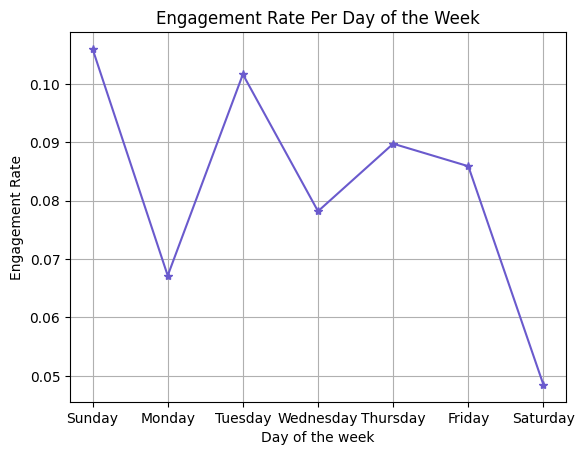

In [184]:
# Ploting day of the week data based on their engagement rates
plt.plot(day_of_week_rate.index, day_of_week_rate, color = 'slateblue', marker="*")
# adding annotations and visuals
plt.xlabel("Day of the week")
plt.ylabel("Engagement Rate")
plt.title("Engagement Rate Per Day of the Week")
plt.grid(True)
plt.savefig('EngagementPerDay.png')
plt.show()

#

In [197]:
# Task 3:
# "General" variable is flawed with some having trailing spaces. Group them first in data.
data['Account'] = data['Account'].str.strip()
game_performance = data.groupby('Account').agg({'Total Engagements': 'sum', 'Total Impressions': 'sum'})
game_performance['Engagement Rate'] = game_performance['Total Engagements'] / game_performance['Total Impressions']
print(game_performance)
account_engagement = game_performance['Engagement Rate']
#print(account_engagement)
best_account = game_performance['Engagement Rate'].idxmax()
worst_account = game_performance['Engagement Rate'].idxmin()
#print(best_account)
best_acc_rate = game_performance.loc[best_account, 'Engagement Rate']
worst_acc_rate = game_performance.loc[worst_account, 'Engagement Rate']
print('The best performing account is the "{}" account with the engagement rate of {:.02%}.'.format(best_account, best_acc_rate))
no_general = game_performance.drop("General")
#print(no_general)
best_account_no_general = no_general['Engagement Rate'].idxmax()
rate_no_general = no_general.loc[best_account_no_general, 'Engagement Rate']
print('The best performing account without including "General" is the "{}" account with the engagement rate of {:.02%}.'.format(best_account_no_general, rate_no_general))
print('The worst performing account is the "{}" account with the engagement rate of {:.02%}.'.format(worst_account, worst_acc_rate))

                  Total Engagements  Total Impressions  Engagement Rate
Account                                                                
CSGO                          92336            2313918         0.039905
Content Creators               1387              45186         0.030695
DOTA2                        123990            1859326         0.066685
General                     3077328           33931757         0.090692
Valorant                        931              22979         0.040515
The best performing account is the "General" account with the engagement rate of 9.07%.
The best performing account without including "General" is the "DOTA2" account with the engagement rate of 6.67%.
The worst performing account is the "Content Creators" account with the engagement rate of 3.07%.


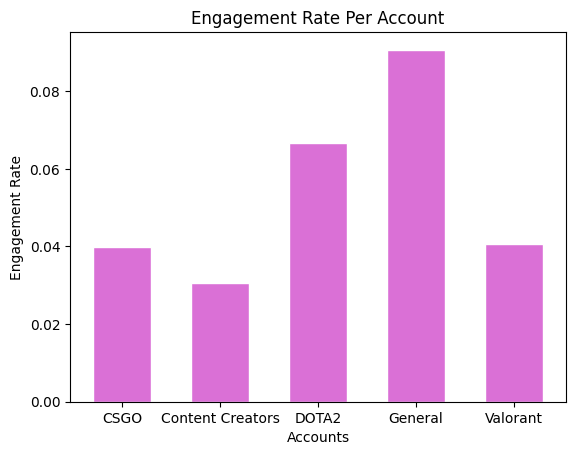

In [186]:
# Ploting engagement rates of accounts
plt.bar(account_engagement.index, account_engagement, width = 0.6, color = "orchid", edgecolor = "white")
# adding annotations and visuals
plt.xlabel("Accounts")
plt.ylabel("Engagement Rate")
plt.title("Engagement Rate Per Account")
plt.savefig('EngagementPerAccount.png')
plt.show()

In [187]:
# Pre Task 4 (Understanding the Media Types):
# The media types Carousel, Mixed, Album, are low on sample size may not be reliable.
print(data["Media Type"].value_counts())

Photo       1490
Video        967
Text         910
Link          94
Carousel       9
Mixed          5
Album          4
Name: Media Type, dtype: int64


In [188]:
# Task 4:
media_performance = data.groupby('Media Type').agg({'Total Engagements': 'sum', 'Total Impressions': 'sum'})
media_performance['Engagement Rate'] = media_performance['Total Engagements'] / media_performance['Total Impressions']
print(media_performance)
best_media = media_performance['Engagement Rate'].idxmax()
worst_media = media_performance['Engagement Rate'].idxmin()
best_media_rate = media_performance.loc[best_media, 'Engagement Rate']
worst_media_rate = media_performance.loc[worst_media, 'Engagement Rate']
print('The best performing media is the "{}" media with the engagement rate of {:.02%}.'.format(best_media, best_media_rate))
print('The worst performing media is the "{}" media with the engagement rate of {:.02%}.'.format(worst_media, worst_media_rate))

# we should drop the album media type to evaluate the data without the outlier.
no_album = media_performance.drop("Album")
best_media = no_album['Engagement Rate'].idxmax()
best_media_rate = no_album.loc[best_media, 'Engagement Rate']

print('The best performing media that is not the album media is the "{}" media with the engagement rate of {:.02%}.'.format(best_media, best_media_rate))


            Total Engagements  Total Impressions  Engagement Rate
Media Type                                                       
Album                       8                 20         0.400000
Carousel                 6541             160689         0.040706
Link                     2257             232465         0.009709
Mixed                   13664             184984         0.073866
Photo                 2167739           23893992         0.090723
Text                   246312            3106203         0.079297
Video                  859451           10594813         0.081120
The best performing media is the "Album" media with the engagement rate of 40.00%.
The worst performing media is the "Link" media with the engagement rate of 0.97%.
The best performing media that is not the album media is the "Photo" media with the engagement rate of 9.07%.


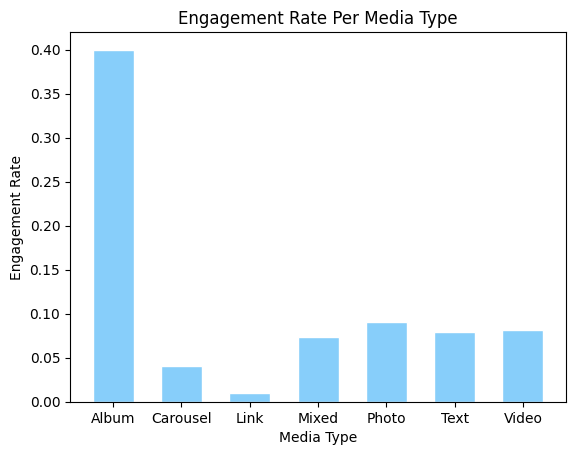

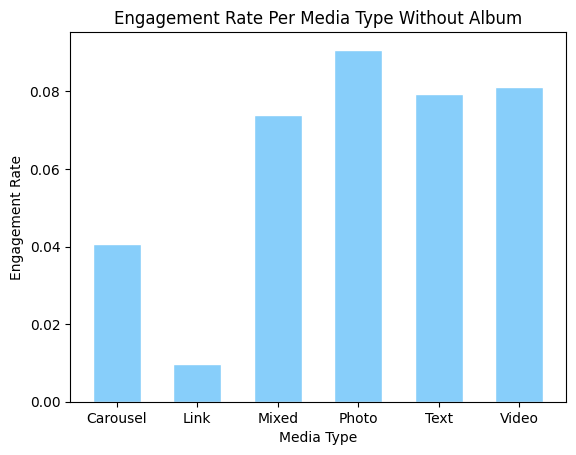

In [189]:
# Ploting engagement rates of Media Types
plt.bar(media_performance.index, media_performance['Engagement Rate'], width = 0.6, color = "lightskyblue", edgecolor = "white")
# adding annotations and visuals
plt.xlabel("Media Type")
plt.ylabel("Engagement Rate")
plt.title("Engagement Rate Per Media Type")
plt.savefig('EngagementPerMedia.png')
plt.show()

#Ploting engagement rates of media types without album
plt.bar(no_album.index, no_album['Engagement Rate'], width = 0.6, color = "lightskyblue", edgecolor = "white")
# adding annotations and visuals
plt.xlabel("Media Type")
plt.ylabel("Engagement Rate")
plt.title("Engagement Rate Per Media Type Without Album")
plt.savefig('EngagementNoAlbum.png')
plt.show()

In [190]:
# Task 5:
data['Campaign Name'] = data['Campaign Name'].str.strip()
campaign_performance = data.groupby('Campaign Name').agg({'Total Engagements': 'sum', 'Total Impressions': 'sum'})
campaign_performance['Engagement Rate'] = campaign_performance['Total Engagements'] / campaign_performance['Total Impressions']
print(campaign_performance)
best_campaign = campaign_performance['Engagement Rate'].idxmax()
best_campaign_rate = campaign_performance.loc[best_campaign, "Engagement Rate"]
print("Best Performing Campaign is categorized as {} with {:.02%} and these are the campaigns that are not categorized.".format(best_campaign, best_campaign_rate))
no_NA = campaign_performance.drop("N/A")
best_no_NA = no_NA['Engagement Rate'].idxmax()
best_no_NA_rate = no_NA.loc[best_no_NA, 'Engagement Rate']
print('Best Performing Campaign aside from "NA" is "{}" with {:.02%}.'.format(best_no_NA, best_no_NA_rate))


                      Total Engagements  Total Impressions  Engagement Rate
Campaign Name                                                              
Community Engagement            2044767           23803756         0.085901
Evergreen                         43127            1328729         0.032457
Evil Exhibited                   185305            5742595         0.032269
N/A                             1022773            7298086         0.140143
Best Performing Campaign is categorized as N/A with 14.01% and these are the campaigns that are not categorized.
Best Performing Campaign aside from "NA" is "Community Engagement" with 8.59%.


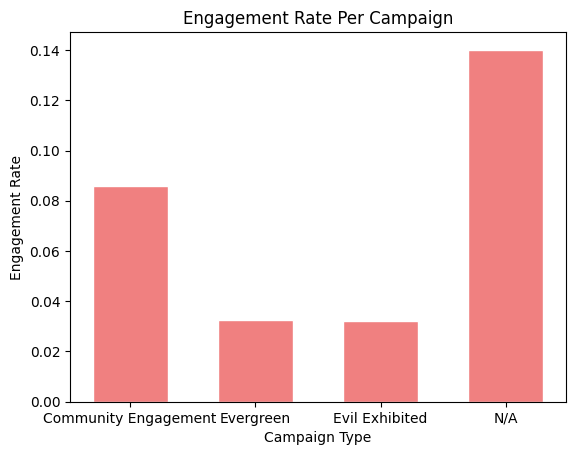

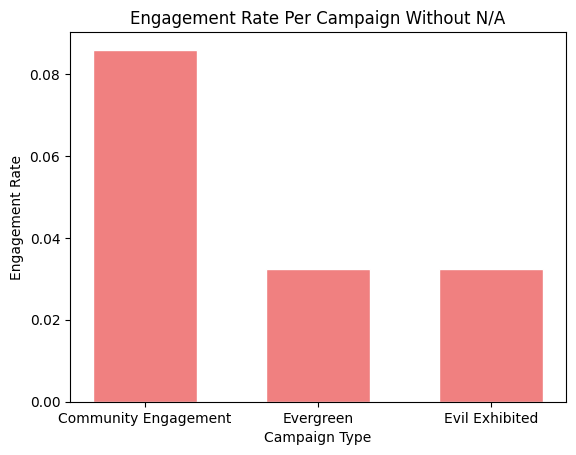

In [191]:
# Ploting engagement rates of campaigns
plt.bar(campaign_performance.index, campaign_performance['Engagement Rate'], width = 0.6, color = "lightcoral", edgecolor = "white")
# adding annotations and visuals
plt.xlabel("Campaign Type")
plt.ylabel("Engagement Rate")
plt.title("Engagement Rate Per Campaign")
plt.savefig('EngagementPerCampaign.png')
plt.show()

# Ploting engagement rates of campaigns without N/A
plt.bar(no_NA.index, no_NA['Engagement Rate'], width = 0.6, color = "lightcoral", edgecolor = "white")
# adding annotations and visuals
plt.xlabel("Campaign Type")
plt.ylabel("Engagement Rate")
plt.title("Engagement Rate Per Campaign Without N/A")
plt.savefig('EngagementNoNA.png')
plt.show()
